In [1]:
import numpy as np
import os
from measurement import *
from analysis2 import *
from beta_vs_radius_plot import CompactFiberSolver
import matplotlib.pyplot as plt
import pandas as pd

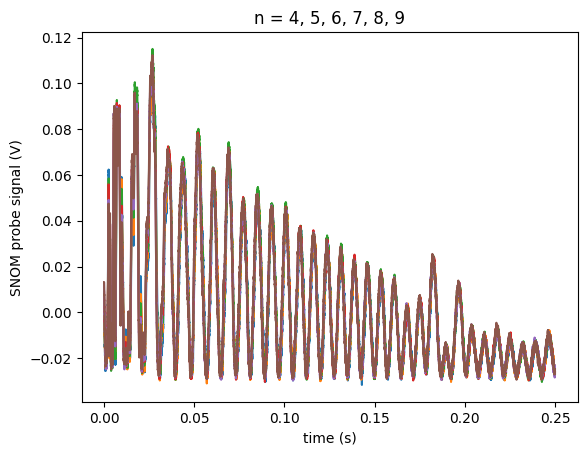

In [ ]:
t_start = 0.0
t_end = 0.25
t_scan = 0.50
for n in np.array([4, 5, 6, 7, 8, 9]):
    x, y = load_data("data/20250912_max1000ms/500ms_10times_.npy", 0, t_start + n*t_scan, t_end + n*t_scan)
    plt.plot(x - n*t_scan, y)
plt.title("n = 4, 5, 6, 7, 8, 9")
]
]
plt.xlabel("time (s)")
plt.ylabel("SNOM probe signal (V)")
plt.show()

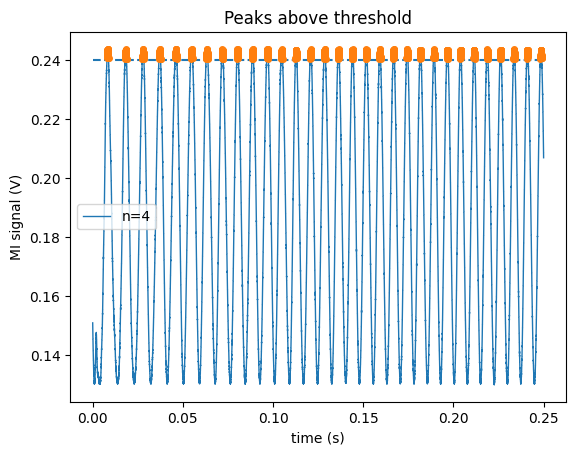

n=4: 1202 peaks above 0.24 V
    top peak: t=0.008285 s, y=0.243827


In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

t_start = 0.0
t_end = 0.250
t_scan = 0.5

# ---- ユーザーが決める絶対しきい値（例）----
y_thresh = 0.24   # ここを任意の値に設定（単位: V）

# 任意パラメータ（不要なら None）
min_distance_s = None   # 例: 0.010 → 10 ms 以内の重複ピークを統合
min_prominence = None   # 例: 0.02  → 谷から0.02 V以上抜けている山のみ

results = {}  # n -> dict(idx, x, y)

for n in np.array([4]):
    x, y = load_data("data/20250912_max1000ms/500ms_10times_.npy", 2,
                     t_start + n*t_scan, t_end + n*t_scan)
    x_al = x - n*t_scan

    # find_peaks の距離は「サンプル数」指定。dt から換算。
    dt = float(np.mean(np.diff(x_al)))
    distance_samples = None if min_distance_s is None else max(1, int(round(min_distance_s / dt)))

    peaks_idx, props = find_peaks(
        y,
        height=y_thresh,                    # ← しきい値より高いピークだけ
        distance=distance_samples,          # ← 近すぎるピークの統合（任意）
        prominence=min_prominence           # ← 山らしさ（任意）
    )

    results[n] = dict(idx=peaks_idx, x=x_al[peaks_idx], y=y[peaks_idx], props=props)

    # 描画
    plt.plot(x_al, y, lw=1.0, label=f"n={n}")
    plt.hlines(y_thresh, x_al.min(), x_al.max(), linestyles='dashed')  # 閾値線
    plt.plot(x_al[peaks_idx], y[peaks_idx], 'o', ms=4)

plt.title("Peaks above threshold")
plt.xlabel("time (s)")
plt.ylabel("MI signal (V)")
plt.legend()
plt.show()

# 検出数と代表値の確認
for n, d in results.items():
    print(f"n={n}: {len(d['idx'])} peaks above {y_thresh} V")
    if len(d['idx']) > 0:
        j = int(np.argmax(d['y']))  # しきい値超えの中で最大
        print(f"    top peak: t={d['x'][j]:.6f} s, y={d['y'][j]:.6g}")
